# Проект Procrastinate Pro+

## Описание проекта:

**Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.**

- Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- Лог сервера с данными об их посещениях,
- Выгрузка их покупок за этот период,
- Рекламные расходы.

**Нам предстоит изучить:**
- Откуда приходят пользователи и какими устройствами они пользуются,
- Сколько стоит привлечение пользователей из различных рекламных каналов;
- Сколько денег приносит каждый клиент,
- Когда расходы на привлечение клиента окупаются,
- Какие факторы мешают привлечению клиентов.

### Описание данных:
*В нашем распоряжении три датасета:*
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.

**Структура visits_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура orders_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура costs_info_short.csv**
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

## Загрузим данные и подготовим их к анализу:

### Импорт библиотек и чтение файлов:

In [1]:
# Импорт библиотек:

import pandas as pd
import numpy as np
import math as mt
import seaborn as sns

from datetime import datetime, timedelta
from math import ceil
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Чтение фалов:
try:
    visits = pd.read_csv(
        '/home/saxofon/Документы/jupdata/visits_info_short.csv')
    orders = pd.read_csv(
        '/home/saxofon/Документы/jupdata/orders_info_short.csv')
    costs = pd.read_csv(
        '/home/saxofon/Документы/jupdata/costs_info_short.csv')
except:
    visits = pd.read_csv(
        '/datasets/visits_info_short.csv')
    orders = pd.read_csv(
        '/datasets/orders_info_short.csv')
    costs = pd.read_csv(
        '/datasets/costs_info_short.csv')

### Обзор "visits_df":

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits['Region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

In [6]:
visits['Device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

In [7]:
visits['Channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

In [8]:
print('Пропуски в Region:', visits['Region'].isna().sum())
print('Пропуски в Device:', visits['Device'].isna().sum())
print('Пропуски в Channel:', visits['Channel'].isna().sum())

Пропуски в Region: 0
Пропуски в Device: 0
Пропуски в Channel: 0


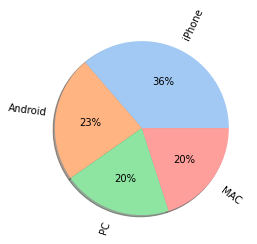

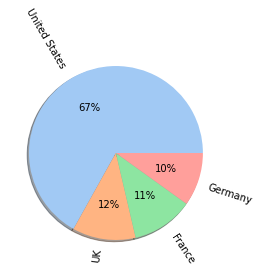

In [9]:
# Pie device
colors = sns.color_palette('pastel')[0:5]
labels_d = ['iPhone', 'Android', 'PC', 'MAC']
plt.pie(visits['Device'].value_counts(),
        labels=labels_d,
        colors=colors,
        autopct='%.0f%%',
        shadow=True,
        rotatelabels='true')
plt.show()

# Pie region
labels_r = ['United States', 'UK', 'France', 'Germany']
plt.pie(visits['Region'].value_counts(),
        labels=labels_r,
        colors=colors,
        autopct='%.0f%%',
        shadow=True,
        rotatelabels='true')
plt.show()

Text(0, 0.5, 'Количество пользователей')

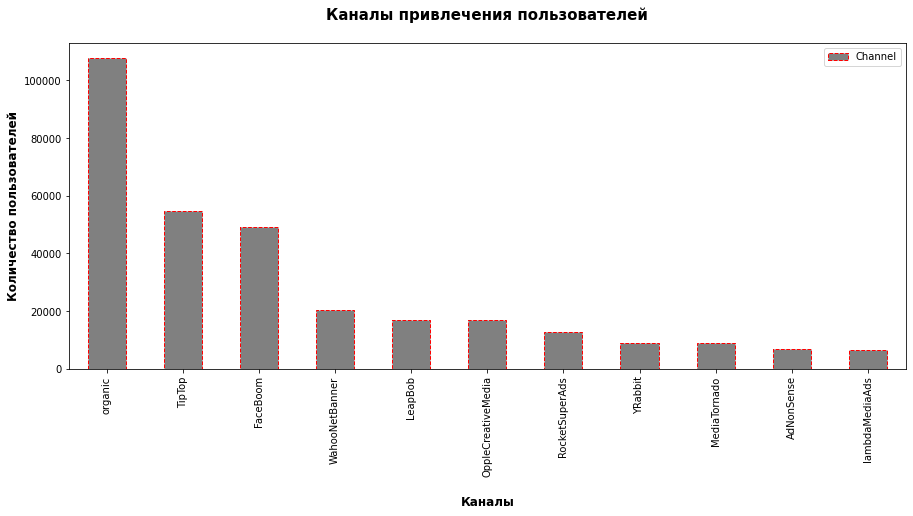

In [10]:
visits['Channel'].value_counts().plot(y='counts',
                                      kind='bar',
                                      color='grey',
                                      edgecolor='red',
                                      linestyle='--',
                                      figsize=(15, 6),
                                      legend=True)

plt.title(label='Каналы привлечения пользователей\n',
          fontsize=15,
          fontweight="bold")
plt.xlabel("\nКаналы", fontsize=12, fontweight="bold")
plt.ylabel("Количество пользователей", fontsize=12, fontweight="bold")

**Промежуточные итоги по поверхностному анализу данных:**
- Больше всего устройств в таблице которые работают на iOS и Android. 
- Самый популярный вид трафика, - "Живой", далее идут соцсети и различные площадки.
- Больше всего пользователей из Америки, далее идёт Великобритания, Франция, Германия.

### Обзор "orders_df":

In [11]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


### Обзор "costs_df":

In [13]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Проверка дубликатов:

In [15]:
print('Дубликаты в visits:', visits.duplicated().sum())
print('Дубликаты в orders:', orders.duplicated().sum())
print('Дубликаты в costs:', costs.duplicated().sum())

Дубликаты в visits: 0
Дубликаты в orders: 0
Дубликаты в costs: 0


- Дубликатов в таблицах нет.

### Изменения в таблицах:

- costs: C таблицей всё в порядке, сменим тип данных в столбце "dt".
- orders: Таблица имеет стандартный вид, с данными всё в порядке, нужно сменить тип данных в столбце "Event Dt" для удобства работы.
- visits: Сменим тип данных в столбцах: "Session Start" и "Session End".
- Общие изменения: Приведём названия столбцов в общий вид.

### Смена типа данных:

In [16]:
# Таблица costs:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
display(costs.info())
print()

# Таблица visits:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
display(visits.info())
print()

# Таблица orders_df:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

### Приведём столбцы к общему виду:

In [17]:
# Столбец visits
visits.columns = visits.columns.str.lower()
visits = visits.rename(
    columns={
        'user id': 'user_id',
        'session start': 'session_start',
        'session end': 'session_end'
    })
print(visits.columns)

# Столбец orders
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
print(orders.columns)

# Столбец costs
costs.columns = costs.columns.str.lower()
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


*Данные в столбцах приводить в общий вид не стал, так как они "Чистые" и дубликаты отсутствуют, потому оставим как есть.*

## Зададим функции для расчета и анализа:

### Функция "get_profiles" (Для создания пользовательских профилей):

In [18]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(
        by=['user_id', 'session_start']).groupby('user_id').agg({
            'session_start':
            'first',
            'channel':
            'first',
            'device':
            'first',
            'region':
            'first',
        }).rename(columns={
            'session_start': 'first_ts'
        }).reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel']).agg({
        'user_id': 'nunique'
    }).rename(columns={
        'user_id': 'unique_users'
    }).reset_index())

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функиця "get_retention" (Удержания):

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функиця "get_conversion" (Конверсии):

In [20]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функиця рассчёта "LTV и ROI":

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция "filter_data" (Для сглаживания фрейма):

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция "plot_retention" (Для визуализации удержания):

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция "plot_conversion" (Для визуализации конверсии):

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция "plot_ltv_roi" (Для визуализации LTV и ROI):

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(25, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных:

1. Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.
2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
4. Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

### 1. Профили и даты привлечения:

In [26]:
# Выведем таблицу профилей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
# Определите минимальную и максимальную дату привлечения пользователей:
print('Минимальная дата привлеченимя:', profiles['first_ts'].min())
print('Максимальная дата привлеченимя:', profiles['first_ts'].max())

Минимальная дата привлеченимя: 2019-05-01 00:00:41
Максимальная дата привлеченимя: 2019-10-27 23:59:04


### 2. Таблица пользователей по странам:

In [28]:
# Напишем функцию для удобства построения таблиц:
def tabl_a(j):
    param = profiles.groupby(j).agg({
        'user_id': 'nunique',
        'payer': ['sum', 'mean']
    })
    param.columns = [
        'Всего пользоватлей', 'Пользователи с покупками', 'В процентах'
    ]
    a = param.sort_values(by='Всего пользоватлей',
                          ascending=False).style.format({
                              'Пользователи с покупками':
                              '{:.0f}',
                              'В процентах':
                              '{:.1%}'
                          })
    return (a)

In [29]:
tabl_a('region')

,Всего пользоватлей,Пользователи с покупками,В процентах
region,,,
United States,100002,6902,6.9%
UK,17575,700,4.0%
France,17450,663,3.8%
Germany,14981,616,4.1%


**Выводы:**
- Больше всего платящих пользователей в США, сразу за ними идёт Германия. Самые отстающие - Французы, возможно, стоит обратить внимание на этот регион, и сделать какую-либо рекламную компанию, либо акцию для этих пользователей.

### 3. Таблица пользователей по устройствам:

In [30]:
tabl_a('device')

,Всего пользоватлей,Пользователи с покупками,В процентах
device,,,
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%
Mac,30042,1912,6.4%


**Выводы:**
- Пользователи в выборке в основном предпочитают мобильные устройства.
- Среди пользователей совершивших покупки в таблице преобладает: Mac и iPhone. На PC же совершается меньше всего покупок.

### 4. Таблица пользователей по рекламным источникам:

In [31]:
tabl_a('channel')

,Всего пользоватлей,Пользователи с покупками,В процентах
channel,,,
organic,56439,1160,2.1%
FaceBoom,29144,3557,12.2%
TipTop,19561,1878,9.6%
OppleCreativeMedia,8605,233,2.7%
LeapBob,8553,262,3.1%
WahooNetBanner,8553,453,5.3%
RocketSuperAds,4448,352,7.9%
MediaTornado,4364,156,3.6%
YRabbit,4312,165,3.8%


**Выводы:**
- Больше всего пользователей идёт от "organic" трафика, меньше всего от "lambdaMediaAds"
- Самый конвертируемые каналы рекламы: "FaceBoom", "AdNonSense" и "lambdaMediaAds". Самый провальный же на первый взгляд: "OppleCreativeMedia".

## Маркетинг:

Проведём исследование:
- Посчитаем общую сумму расходов на маркетинг. Выясним, как затраты распределены по источникам. Визуализируем изменения метрик во времени.
- Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний "CAC" на одного пользователя для всего проекта и для каждого источника трафика.

### Рассходы на маркетинг:

In [32]:
print('Общая сумма расходов на маркетинг:',
      int(profiles['acquisition_cost'].sum()))

Общая сумма расходов на маркетинг: 105497


In [33]:
print('Общие расходы по каналам:')
profiles.groupby('channel')[['acquisition_cost']].sum().sort_values(
    'acquisition_cost',
    ascending=False).style.bar().format({'acquisition_cost': '{:.1f}'})

Общие расходы по каналам:


,acquisition_cost
channel,
TipTop,54751.3
FaceBoom,32445.6
WahooNetBanner,5151.0
AdNonSense,3911.3
OppleCreativeMedia,2151.2
RocketSuperAds,1833.0
LeapBob,1797.6
lambdaMediaAds,1557.6
MediaTornado,954.5


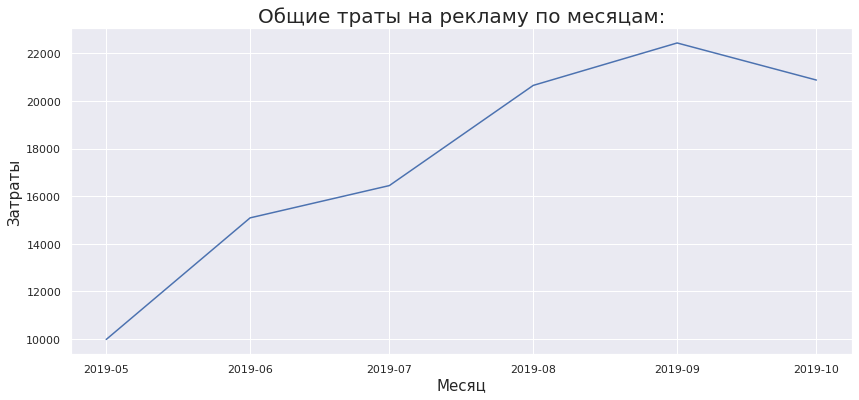

In [34]:
# Расходы по месяцам:
pivot_prof = profiles.pivot_table(index='month',
                                  values='acquisition_cost',
                                  aggfunc='sum')

# Строим график:
plt.figure(figsize=(14, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=pivot_prof, x='month', y='acquisition_cost')
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Затраты', fontsize=15)
plt.title('Общие траты на рекламу по месяцам:', fontsize=20)
plt.show()

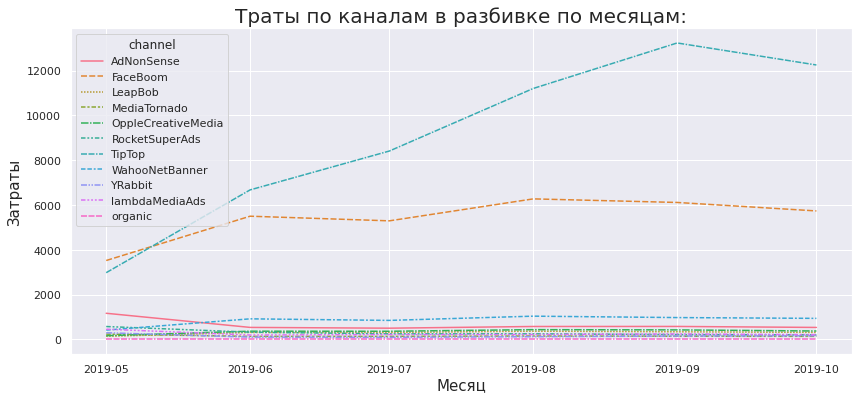

In [35]:
pivot_prof1 = profiles.pivot_table(index='month',
                                   columns='channel',
                                   values='acquisition_cost',
                                   aggfunc='sum')

plt.figure(figsize=(14, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=pivot_prof1)

plt.xlabel("Месяц", fontsize=15)
plt.ylabel("Затраты", fontsize=15)
plt.title("Траты по каналам в разбивке по месяцам:", fontsize=20)
plt.show()

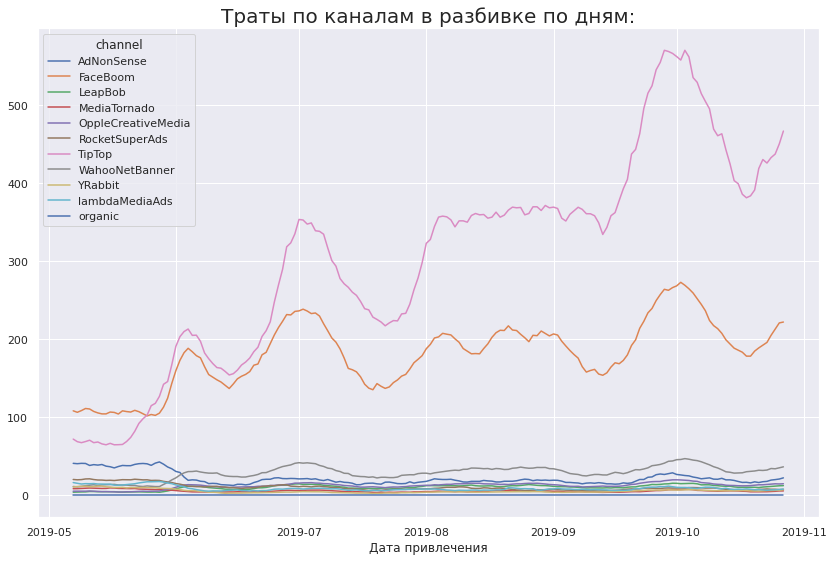

In [36]:
report = profiles.pivot_table(index='dt',
                              columns='channel',
                              values='acquisition_cost',
                              aggfunc='sum')

# Установим "сглаживание" на 7.
window = 7
filter_data(report, window).plot(grid=True, figsize=(14, 9))
plt.title('Траты по каналам в разбивке по дням:', fontsize=20)
plt.xlabel('Дата привлечения')
plt.show()

**Промежуточные выводы:**
- Общая сумма расходов на маркетинг: 105497
- Больше всего было потрачено на каналы: "TipTop" и "FaceBoom"
- Самый затратный месяц по рекламе был сентябрь и октябрь, сильное повышение затрат на рекламу началось примерно с июня.

### Рассчитаем средний "CAC":

In [37]:
print('Средний CAC на одного пользователя:\n',
      (profiles.query('channel != "organic"').groupby('user_id')[['acquisition_cost']].mean()).mean())

Средний CAC на одного пользователя:
 acquisition_cost    1.127481
dtype: float64


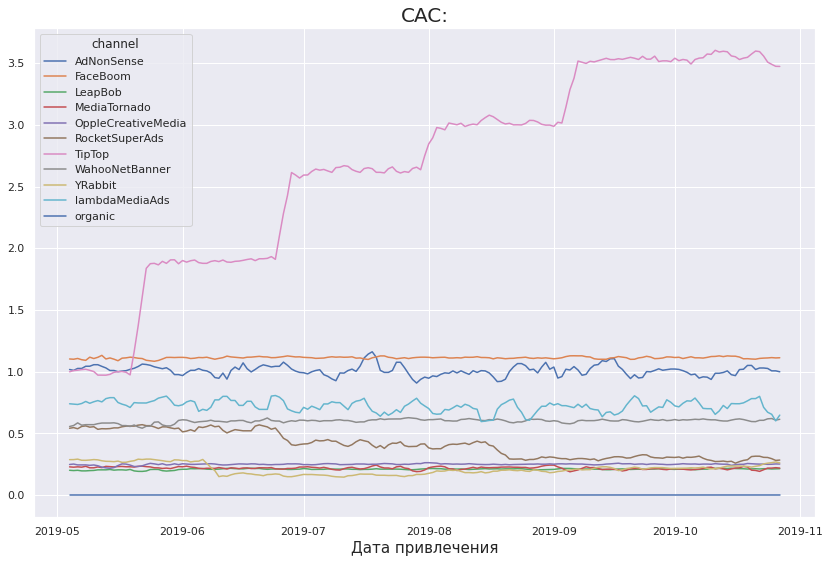

In [38]:
# CAC по каналам привлечения:
cac = profiles.pivot_table(index='dt',
                           columns='channel',
                           values='acquisition_cost',
                           aggfunc='mean')

# Установим "сглаживание" на 4.
window = 4
filter_data(cac, window).plot(grid=True, figsize=(14, 9))
plt.title('CAC:', fontsize=20)
plt.xlabel('Дата привлечения', fontsize=15)
plt.show()

In [39]:
print('Таблица CAC:')
profiles.groupby('channel')[['acquisition_cost']].mean().sort_values(
    'acquisition_cost',
    ascending=False).style.bar().format({'acquisition_cost': '{:.2f}'})

Таблица CAC:


,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Промежуточные выводы:**
- Средний CAC на одного пользователя: 1.12
- Самые дорогие каналы по показателю САС: "TipTop", "FaceBoom" и "AdNonSense"
- Можно обнаружить, что канал "TipTop" достаточно нестабилен в показателе САС, в отличии от остальных каналов.

## Оценим окупаемость рекламы:

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Также, будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

### Проанализируем общую окупаемость рекламы:

*Исходя из текущей даты, зададим горизонт и момент анализа. Данные пользователей которых мы привлекаем "бесплатно" будут влиять на конечный вид таблицы, потому таких пользователей нужно исследовать отдельно, но так как такой задачи не стоит, исключим из нашего анализа.*

In [40]:
# Момент и горизонт анализа:
observation_date = datetime(2019, 11, 1).date()
# Установим горизонт на 14 дней, далее будем для удобства чтения графиков использовать именно его:
horizon_days = 14
# Исключим органик пользоватей из фрейма:
profiles = profiles.query('channel != "organic"')

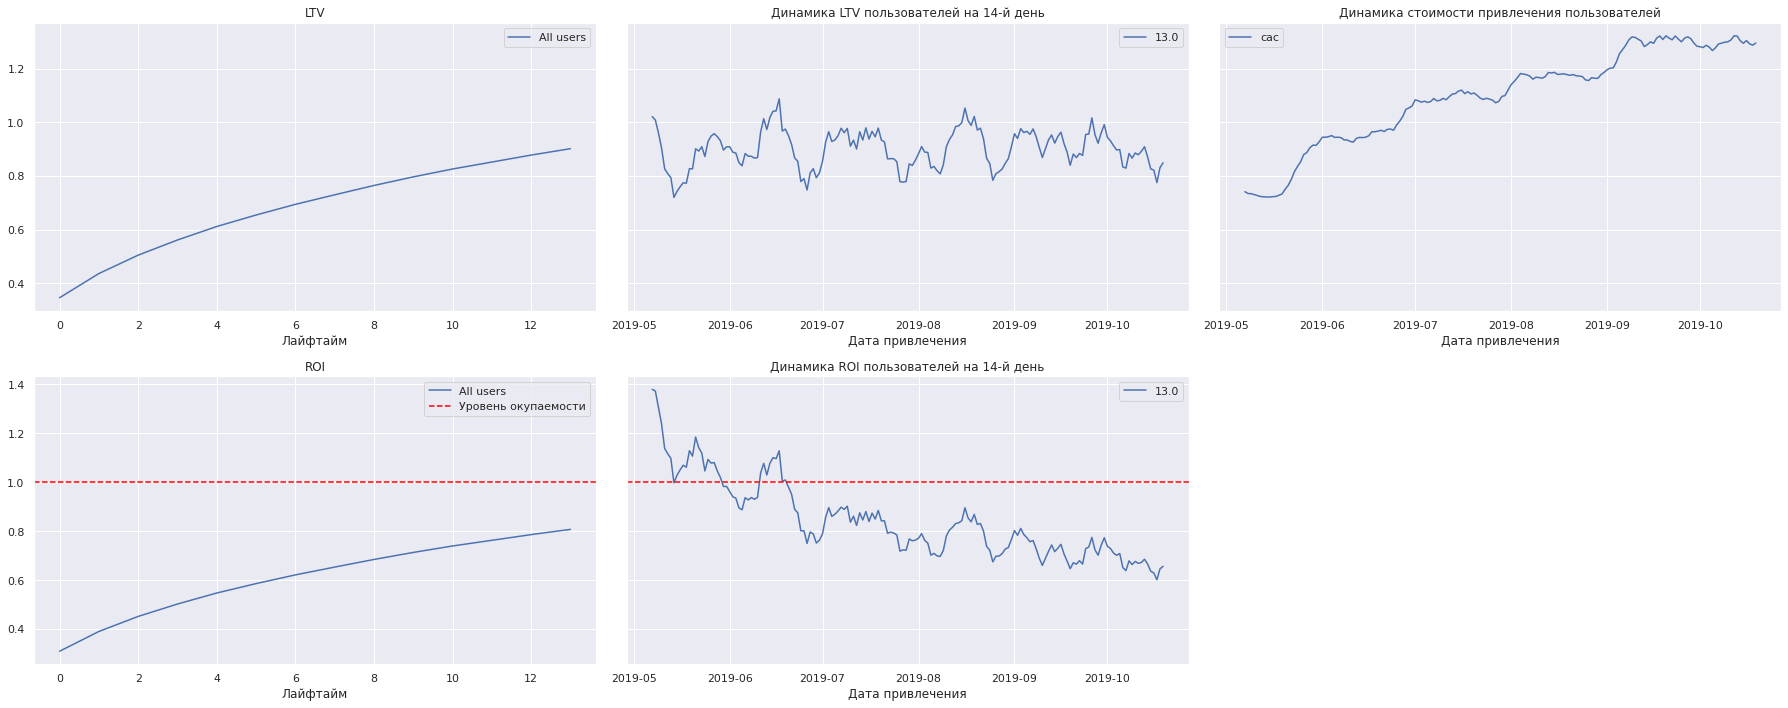

In [41]:
# Строим графики, вызовем функции:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Промежуточные выводы:**
- Исходя из графика окупаемости ROI, реклама не окупается, линия приближается к отметке в 80%, компания терпит убытки.
- График САС нестабилен, видно что рекламный бюджет увеличивается с самого начала нашего исследования.
- LTV также нестабилен, несмотря на увеличение рекламного бюджета, этот показатель падает (примерно пропорционально этому показателю растёт бюджет САС), возможно, ухудшилось "качество" пользователей.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам:

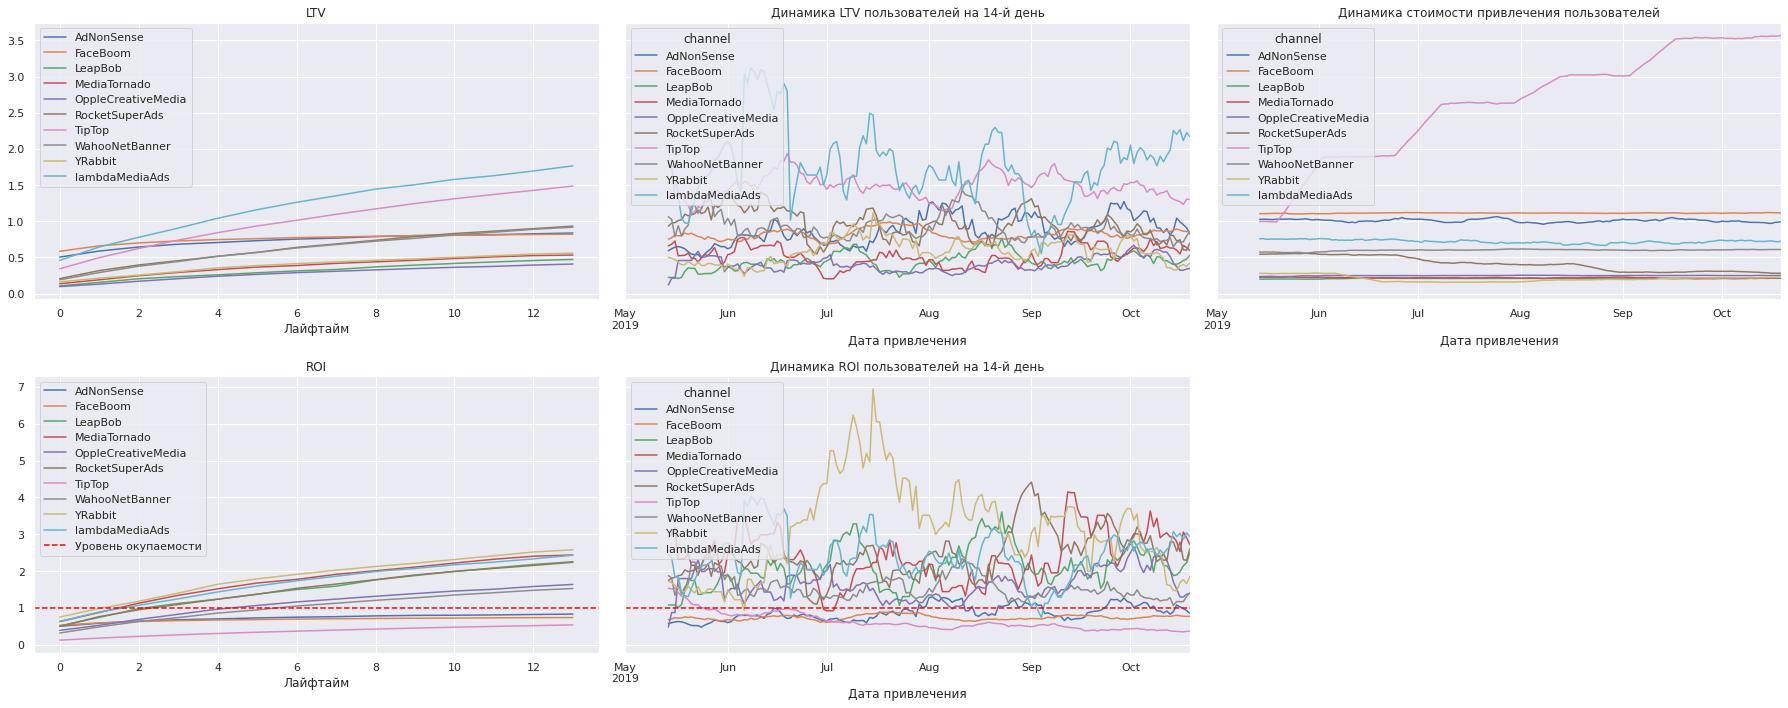

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             horizon_days,
             window=14)

**Промежуточные выводы:**
- Каналы по которым наблюдается лучший LTV: "lambdaMediaAds" и "TipTop"
- Самые окупаемые каналы по ROI: "YRabbit", "MediaTornado" и "lambdaMediaAds"
- Каналы которые не окупаются по ROI: "TipTop", "FaceBoom" и "AdNonSense", остальные каналы окупаются.
- Также можно наблюдать активный рост рекламного бюджета по каналу "TipTop", что мы могли наблюдать и ранее. 

### Проанализируем окупаемость рекламы с разбивкой по странам:

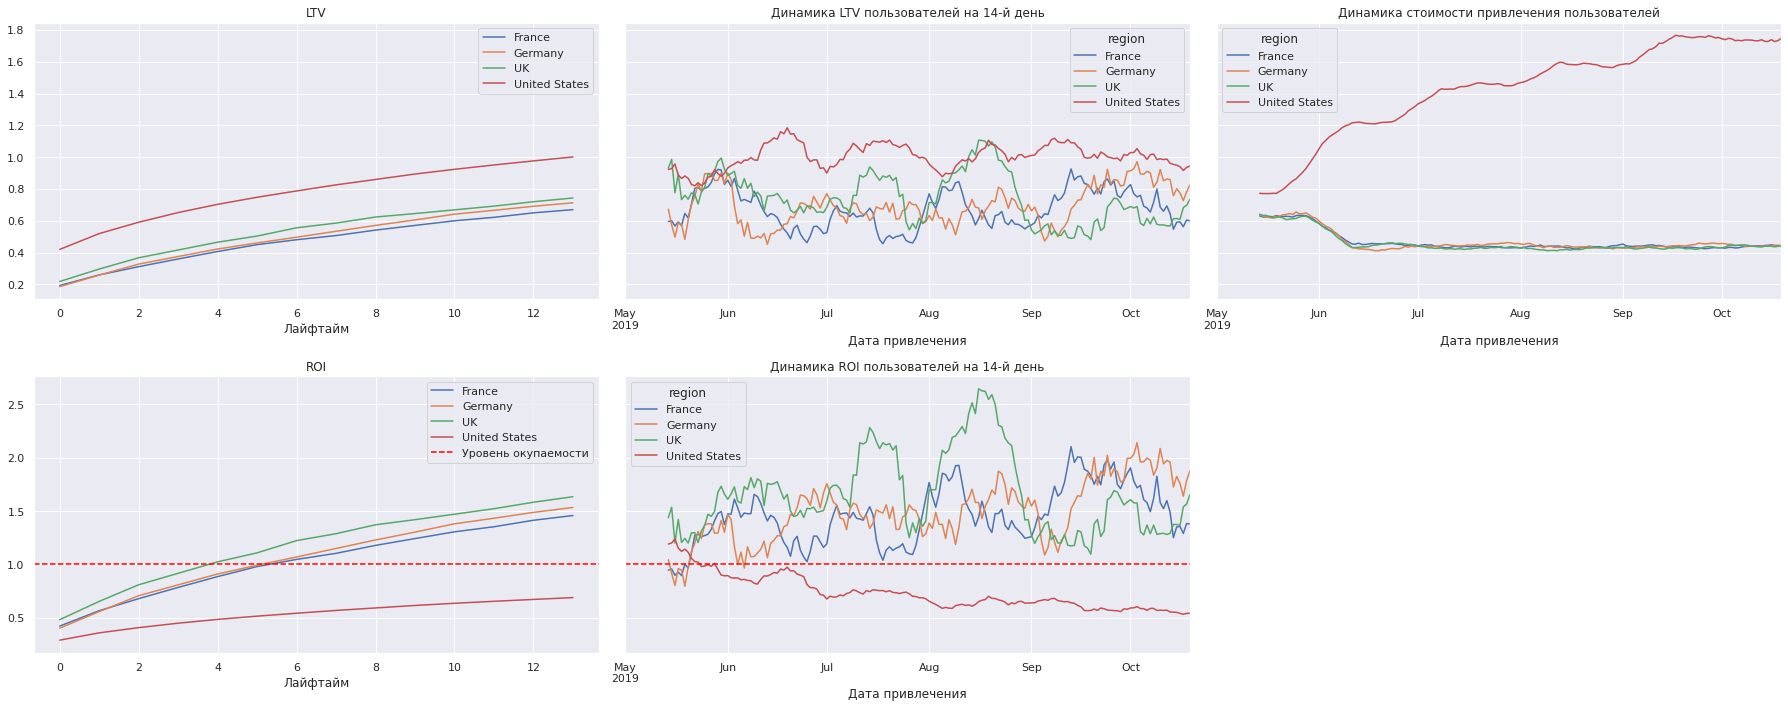

In [43]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             horizon_days,
             window=14)

**Промежуточные выводы:**
- Все страны кроме США окупаются.
- Самая выгодная реклама в UK.
- Самый большой LTV у США, что показывается насколько перспективным может быть рынок для компании.
- Можно заметить, что динамика CAC для пользователей сильно растёт, в то время как их ROI падает.

*Дополнительно построим таблицу для наглядности, свяжем рекламные каналы и страны, посмотрим что получится:*

In [44]:
profiles.pivot_table(
    index='region',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum').round(0).style.background_gradient(axis=None)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1376.000000,nan,628.000000,nan,747.000000,nan,nan,1789.000000,nan,535.000000
Germany,1229.000000,nan,530.000000,nan,641.000000,nan,nan,1553.000000,nan,471.000000
UK,1306.000000,nan,640.000000,nan,763.000000,nan,nan,1809.000000,nan,551.000000
United States,nan,32446.000000,nan,954.000000,nan,1833.000000,54751.000000,nan,944.000000,nan


In [45]:
profiles.groupby('region')[['acquisition_cost']].sum().sort_values(
    'acquisition_cost',
    ascending=False).style.bar().format({'acquisition_cost': '{:.1f}'})

,acquisition_cost
region,
United States,90928.6
France,5076.0
UK,5068.5
Germany,4424.2


*Выводы:*
- По всей видимости маркетологи вкладывают свой рекламный бюджет в каналы: "TipTop" и "FaceBoom" по стране США, однако, какой-либо выгоды это не приносит.

### Проанализируем окупаемость рекламы с разбивкой по устройствам:

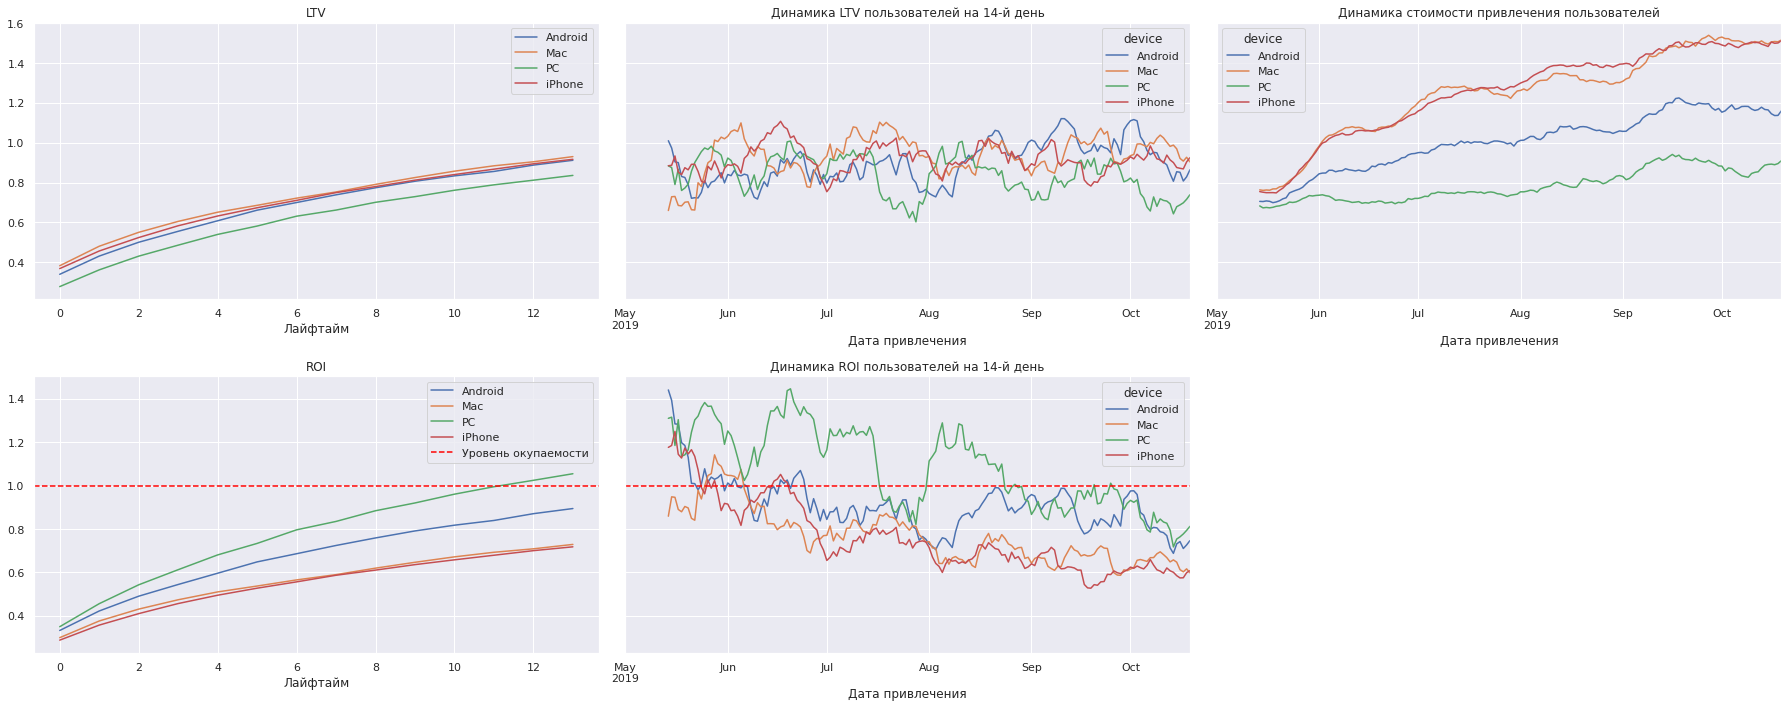

In [46]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             horizon_days,
             window=14)

**Промежуточные выводы:**
- Устройства Android, Mac и iPhone вовсе не окупаются.
- Устройства РС немного выходят за уровень окупаемости.
- Стоимость привлечения стабильно растёт по всем устройствам.

### Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам:

**Ответим на вопросы:**
- Окупается ли реклама в целом?
- Какие устройства, страны и каналы могут снижать окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

#### Графики конверсии и удержания с разбивкой по устройствам:

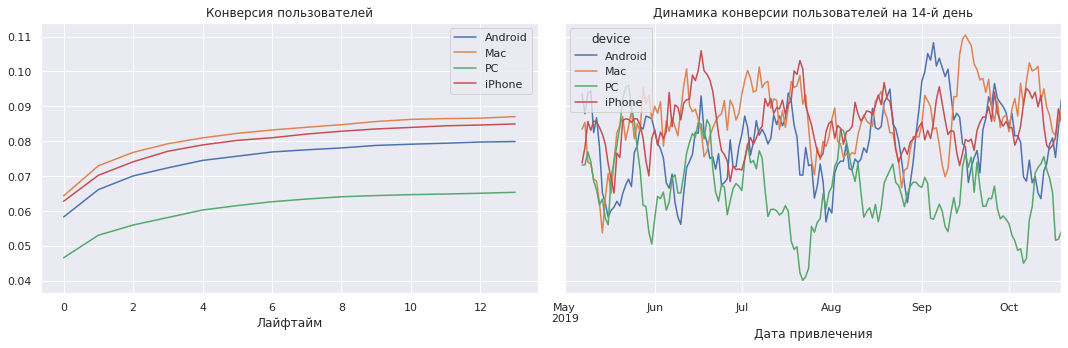

In [47]:
# Конверсия по устройствам:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

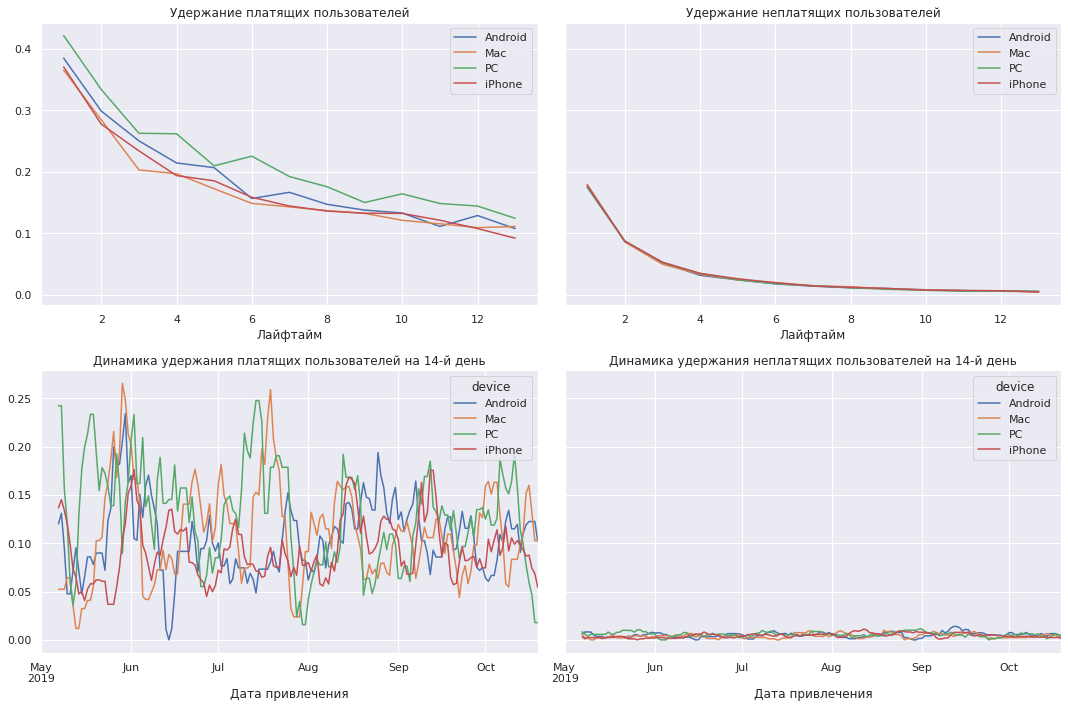

In [48]:
# Удержание по устройствам:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточные выводы:**
- Конверсия пользователей по устройствам примерно одинаковая, единственное выбивается РС, но это возможно связано с тем, что большинство пользователей в современном мире делают покупки не дома за домашним компьютером, а чаще в пути, либо на мобильных устройствах.
- Графики удержания выглядят нормально, без явных аномалий.

#### Графики конверсии и удержания с разбивкой по странам:

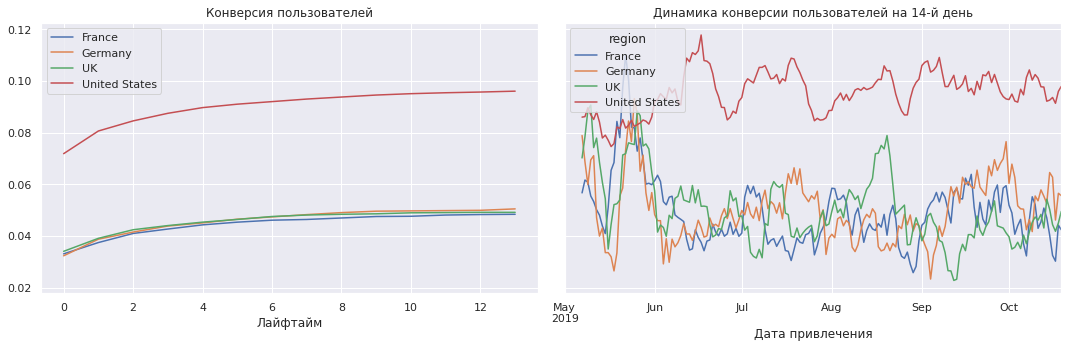

In [49]:
# Конверсия по странам:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

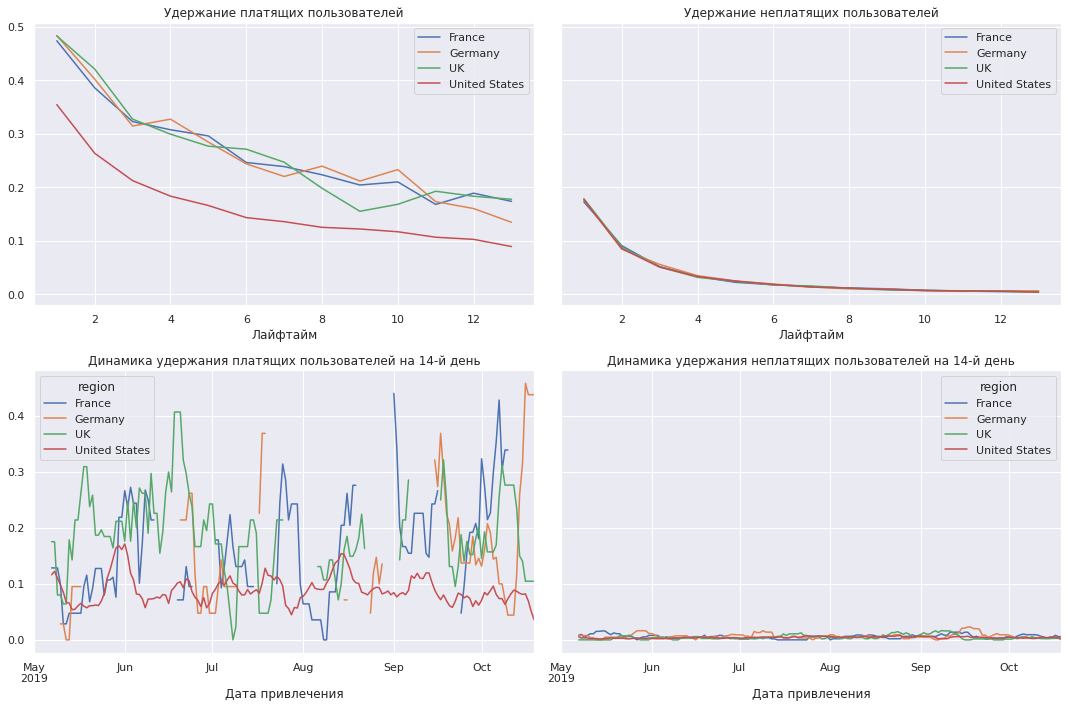

In [50]:
# Удержание по странам:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточные выводы:**
- Хорошая конверсия пользователей у США, однако вместе с этим есть проблемы с удержанием платящих пользователей, этот показатель у США самый низкий, среди остальных стран.
- Остальные страны показывают примерно одинаковые показатели, явных аномалий выявлено не было.

#### Графики конверсии и удержания с разбивкой по каналам:

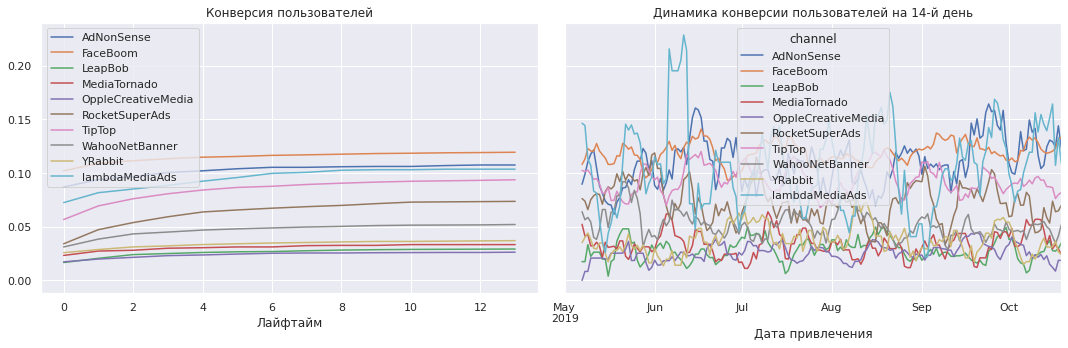

In [51]:
# Конверсия по каналам:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

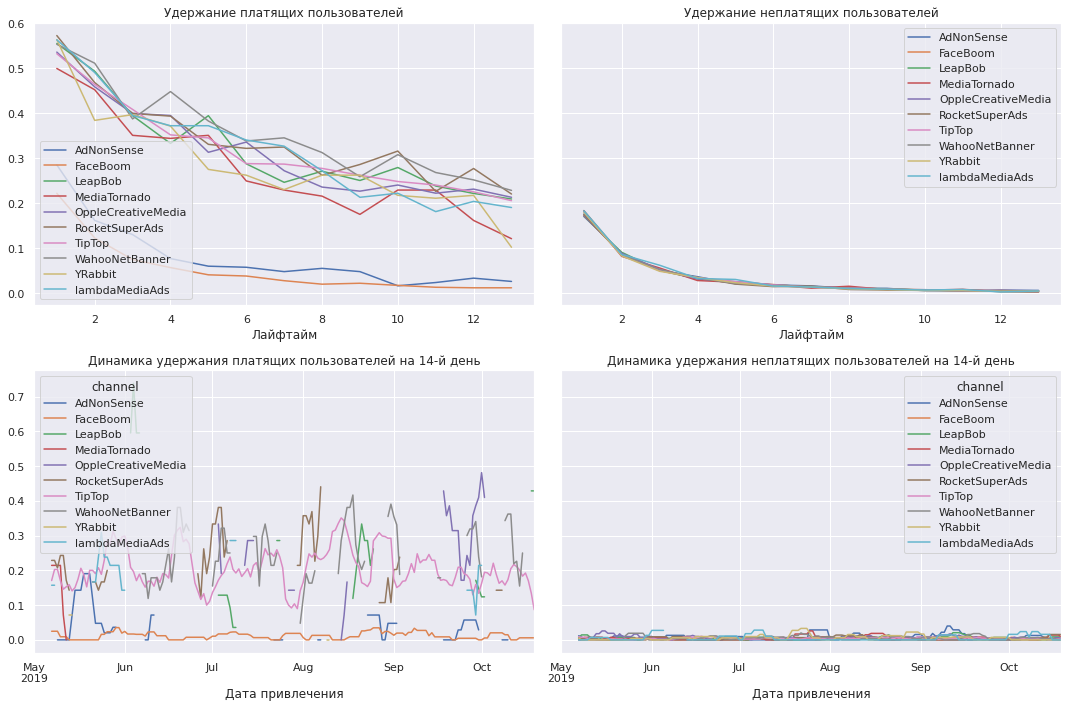

In [52]:
# Удержание по каналам:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточные выводы:**
- Очень низкое удержание пользователей у "FaceBoom" и "AdNonSense".
- Остальные источники в среднем показывают примерно одинаковые результаты.

**Ответы на вопросы:**
- Реклама целиком не окупается, уровень окупаемости рекламы около 80%
- Сильно не окупаются устройства: Mac и iPhone.
- Также сильно влияет на окупаемость США, в отличии от остальных стран, РОИ довольно сильно отстаёт.
- Каналы которые не окупаются по ROI: "TipTop", "FaceBoom" и "AdNonSense", остальные каналы окупаются.
**Возможные причины проблем и рекомендации для рекламного отдела:**
- "Раздутый" рекламный бюджет в направлениях которые не дают ожидаемой прибыли, н-р каналы "TipTop" и "FaceBoom".
- Стоит обратить внимание на другие страны, либо поменять каналы привлечения в США, так как реклама в этой стране и удержание пользователей сильно отстаёт от остальных стран.
- Также обратить внимание на такие рекламные каналы как: "YRabbit", "MediaTornado" и "lambdaMediaAds", они показывают довольно хороший ROI.
- Очень низкая конверсия пользователей на РС, возможно, стоит уделить внимание интерфейсу приложения на этой платформе.

## Вывод:

**В данном исследовании мы:**
1. На этапе обработки данных:
- Сменили тип данных в столбцах, и привели названия к общему виду.
- Дубликатов не было обнаружено.
2. Написали блок с функциями для удобства анализа данных.
3. Провели подробный анализ маркетинговых параметров.
**Итоги анализа:**
- Больше всего устройств в таблице которые работают на iOS и Android. 
- Самый популярный вид трафика, - "Живой", далее идут соцсети и различные площадки.
- Больше всего пользователей из Америки, далее идёт Великобритания, Франция, Германия.
- Больше всего платящих пользователей в США, сразу за ними идёт Германия. Самые отстающие - Французы, возможно, стоит обратить внимание на этот регион, и сделать какую-либо рекламную компанию, либо акцию для этих пользователей.
- Пользователи в выборке в основном предпочитают мобильные устройства.
- Среди пользователей совершивших покупки в таблице преобладает: Mac и iPhone. На PC же совершается меньше всего покупок.
- Больше всего пользователей идёт от "organic" трафика, меньше всего от "lambdaMediaAds"
- Общая сумма расходов на маркетинг: 105497
- Больше всего было потрачено на каналы: "TipTop" и "FaceBoom"
- Самый затратный месяц по рекламе был сентябрь и октябрь, сильное повышение затрат на рекламу началось примерно с июня.
- Средний CAC на одного пользователя: 0.7
- Самые дорогие каналы по показателю САС: "TipTop", "FaceBoom" и "AdNonSense"
- Можно обнаружить, что канал "TipTop" достаточно нестабилен в показателе САС, в отличии от остальных каналов.
- Исходя из графика окупаемости ROI, реклама не окупается, линия приближается к отметке в 80%, компания терпит убытки.
- График САС нестабилен, видно что рекламный бюджет увеличивается с самого начала нашего исследования.
- LTV также нестабилен, несмотря на увеличение рекламного бюджета, этот показатель падает (примерно пропорционально этому показателю растёт бюджет САС), возможно, ухудшилось "качество" пользователей.
- Каналы по которым наблюдается лучший LTV: "lambdaMediaAds" и "TipTop"
- Самые окупаемые каналы по ROI: "YRabbit", "MediaTornado" и "lambdaMediaAds"
- Каналы которые не окупаются по ROI: "TipTop", "FaceBoom" и "AdNonSense", остальные каналы окупаются.
- Также можно наблюдать активный рост рекламного бюджета по каналу "TipTop", что мы могли наблюдать и ранее.
- Все страны кроме США окупаются.
- Самая выгодная реклама в UK.
- Самый большой LTV у США, что показывается насколько перспективным может быть рынок для компании.
- Можно заметить, что динамика CAC для пользователей сильно растет, в то время как их ROI падает.
- Устройства Android, Mac и iPhone вовсе не окупаются.
- Устройства РС немного выходят за уровень окупаемости.
- Стоимость привлечения стабильно растет по всем устройствам.
- Конверсия пользователей по устройствам примерно одинаковая, единственное выбивается РС, но это возможно связано с тем, что большинство пользователей в современном мире делают покупки не дома за домашним компьютером, а чаще в пути, либо на мобильных устройствах.
- Графики удержания по устройствам выглядят нормально, без явных аномалий.
- Хорошая конверсия пользователей у США, однако вместе с этим есть проблемы с удержанием платящих пользователей, этот показатель у США самый низкий, среди остальных стран.
- Остальные страны показывают примерно одинаковые показатели, явных аномалий в графиках выявлено не было.
- Очень низкое удержание пользователей у "FaceBoom" и "AdNonSense".
- Остальные источники в среднем показывают примерно одинаковые результаты.
**Возможные причины проблем и рекомендации для рекламного отдела:**
- "Раздутый" рекламный бюджет в направлениях которые не дают ожидаемой прибыли, н-р каналы "TipTop" и "FaceBoom".
- Стоит обратить внимание на другие страны, либо поменять каналы привлечения в США, так как реклама в этой стране и удержание пользователей сильно отстаёт от остальных стран.
- Также обратить внимание на такие рекламные каналы как: "YRabbit", "MediaTornado" и "lambdaMediaAds", они показывают довольно хороший ROI.
- Очень низкая конверсия пользователей на РС, возможно, стоит уделить внимание интерфейсу приложения на этой платформе.
- Маркетологи вкладывают свой рекламный бюджет в каналы: "TipTop" и "FaceBoom" по стране США, однако, какой-либо выгоды это не приносит, им следует рассмотреть другие страны, либо другие рекламные каналы, основываясь на статистике и показателях ROI.